In [12]:

from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set(rc={'figure.figsize':(6,8)}) 

import warnings
warnings.simplefilter("ignore")

%matplotlib inline

from sklearn.preprocessing import LabelEncoder 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.metrics import SCORERS
import re

import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
privacy = pd.read_csv("data_privacy_tweets.csv")

In [5]:
privacy.shape

(10803, 90)

In [6]:
privacy.head()

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
0,x1166589525386301440,x1404485195676459008,2021-06-14 17:05:39,privacy_issues,The @EFF finds that the proposed modifications...,TweetDeck,248,NaN,NaN,NaN,...,1036,2177,2019-08-28 05:53:33,False,https://t.co/HFMGW8U18M,http://bit.ly/privacyissuessignup,NaN,https://pbs.twimg.com/profile_banners/11665895...,NaN,http://pbs.twimg.com/profile_images/1166589644...
1,x1166589525386301440,x1403010409473449986,2021-06-10 15:25:22,privacy_issues,The European Parliament passes the new #EU #CO...,TweetDeck,223,NaN,NaN,NaN,...,1036,2177,2019-08-28 05:53:33,False,https://t.co/HFMGW8U18M,http://bit.ly/privacyissuessignup,NaN,https://pbs.twimg.com/profile_banners/11665895...,NaN,http://pbs.twimg.com/profile_images/1166589644...
2,x1166589525386301440,x1404185087093182465,2021-06-13 21:13:07,privacy_issues,To gain better control over the increasingly p...,TweetDeck,240,NaN,NaN,NaN,...,1036,2177,2019-08-28 05:53:33,False,https://t.co/HFMGW8U18M,http://bit.ly/privacyissuessignup,NaN,https://pbs.twimg.com/profile_banners/11665895...,NaN,http://pbs.twimg.com/profile_images/1166589644...
3,x1166589525386301440,x1401833811940306947,2021-06-07 09:30:00,privacy_issues,What if the consumers are on the driving seat ...,TweetDeck,255,NaN,NaN,NaN,...,1036,2177,2019-08-28 05:53:33,False,https://t.co/HFMGW8U18M,http://bit.ly/privacyissuessignup,NaN,https://pbs.twimg.com/profile_banners/11665895...,NaN,http://pbs.twimg.com/profile_images/1166589644...
4,x1166589525386301440,x1401555697163280387,2021-06-06 15:04:52,privacy_issues,"""Vera Jourová says new rules are needed to lim...",TweetDeck,230,NaN,NaN,NaN,...,1036,2177,2019-08-28 05:53:33,False,https://t.co/HFMGW8U18M,http://bit.ly/privacyissuessignup,NaN,https://pbs.twimg.com/profile_banners/11665895...,NaN,http://pbs.twimg.com/profile_images/1166589644...


In [7]:
privacy = privacy.drop_duplicates('text')

In [8]:
#Check missing values
privacy.isna().sum()/privacy.shape[0] 

user_id                   0.000000
status_id                 0.000000
created_at                0.000000
screen_name               0.000000
text                      0.000000
                            ...   
profile_expanded_url      0.302529
account_lang              1.000000
profile_banner_url        0.135283
profile_background_url    0.276864
profile_image_url         0.000000
Length: 90, dtype: float64

In [9]:
#Not sure how to drop over 80 columns at one time so keep text instead.
df = privacy[["text", "is_quote", "is_retweet", "retweet_count", "hashtags", "followers_count"]]

In [10]:
df.head()

,text,is_quote,is_retweet,retweet_count,hashtags,followers_count
0,The @EFF finds that the proposed modifications...,False,False,0,COVID,406
1,The European Parliament passes the new #EU #CO...,False,False,0,EU COVID19 GDPR,406
2,To gain better control over the increasingly p...,False,False,0,China datasharing datasecurity,406
3,What if the consumers are on the driving seat ...,False,False,1,privacypolicy tech DataPrivacy innovation Priv...,406
4,"""Vera Jourová says new rules are needed to lim...",False,False,1,EU US,406


In [13]:
wnet = WordNetLemmatizer()
port = PorterStemmer()

In [14]:

!pip install textblob
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\18005\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\18005\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\18005\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\18005\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\18005\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\18005\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!

In [19]:
def cleanTxt(txt):
    txt = txt.lower()
    txt = re.sub(r'RT[\s]+', '', txt) #removing RT
    txt = re.sub(r'[^\w\s]','', txt) #remove everything except words and space
    txt = re.sub(r'_','', txt) #how to remove underscore as well
    if 'https' in txt: # removing hyperlinks 
        pos = txt.find('https')
        txt = txt[:pos]
    return txt


In [20]:
text = df[["text"]]
pd.set_option('display.max_colwidth', -1)
text

,text
0,the eff finds that the proposed modifications to the hipaa would invade your most personal and intimiate health data \r\n\r\nstating that trust in healthcare is crucial and especially so during the covid pandemic\r\n\r\nread more
1,the european parliament passes the new eu covid19 certificate regulation detailing peoples covid information\r\n\r\npromising that all personal data will be processed in line with the gdpr\r\n\r\nread more
2,to gain better control over the increasingly powerful technology sector in china new regulations in china make it harder for big tech to refuse the governments request for datasharing \r\n\r\ndatasecurity\r\n\r\nread more
3,what if the consumers are on the driving seat to agree or disagree to the privacypolicy of the tech giants article by beth magnuson\r\nexplains dataprivacy amp innovation on venturebeat \r\n\r\n
4,vera jourová says new rules are needed to limit the bulk collection of europeans data\r\n\r\nthe eu is requiring new legislation limiting us government agencies from accessing european data \r\n\r\nread more at
...,...
10798,stacc drlindadykes nhsdigital for unknown to me reasons the data privacy impact assessment is not published yet i suspect it will be similar to this one
10799,fw magazine talks to sophie dawson bryony hurst ariane mole johan polet and lennart schuessler at twobirds about data privacy disputes key issues include the uptake of data privacy litigation recent notable cases damages and much more
10800,some government websites ask lots of security questions that require personal answers yet state you have no reasonable expectation of privacy regarding any communications transmitted through or data stored on this information system not cool
10801,tiktok quietly updated its privacypolicy to collect users biometric data


In [21]:
df['text'] = df['text'].apply(cleanTxt)
df.head()

,text,is_quote,is_retweet,retweet_count,hashtags,followers_count
0,the eff finds that the proposed modifications to the hipaa would invade your most personal and intimiate health data \r\n\r\nstating that trust in healthcare is crucial and especially so during the covid pandemic\r\n\r\nread more,False,False,0,COVID,406
1,the european parliament passes the new eu covid19 certificate regulation detailing peoples covid information\r\n\r\npromising that all personal data will be processed in line with the gdpr\r\n\r\nread more,False,False,0,EU COVID19 GDPR,406
2,to gain better control over the increasingly powerful technology sector in china new regulations in china make it harder for big tech to refuse the governments request for datasharing \r\n\r\ndatasecurity\r\n\r\nread more,False,False,0,China datasharing datasecurity,406
3,what if the consumers are on the driving seat to agree or disagree to the privacypolicy of the tech giants article by beth magnuson\r\nexplains dataprivacy amp innovation on venturebeat \r\n\r\n,False,False,1,privacypolicy tech DataPrivacy innovation PrivacyTech Technology DataPrivacy,406
4,vera jourová says new rules are needed to limit the bulk collection of europeans data\r\n\r\nthe eu is requiring new legislation limiting us government agencies from accessing european data \r\n\r\nread more at,False,False,1,EU US,406


In [22]:
def cleanTxt(txt):
    txt = re.sub(r'@[A-Za-z0-9]+', '', txt)
    txt = re.sub(r'#', '', txt) #removing the # symbol
    txt = re.sub(r'RT[\s]+', '', txt) #removing RT
    txt = re.sub(r'https?:\/\/S+', '', txt)
    txt = re.sub(r'[^\w\s]','', txt) #remove everything except words and space
    txt = re.sub(r'_','', txt) #how to remove underscore as well
    return txt

#cleaning text
text['text'] = text['text'].apply(cleanTxt)

#show cleaned text
pd.set_option('display.max_colwidth', -1)
text

,text
0,the eff finds that the proposed modifications to the hipaa would invade your most personal and intimiate health data \r\n\r\nstating that trust in healthcare is crucial and especially so during the covid pandemic\r\n\r\nread more
1,the european parliament passes the new eu covid19 certificate regulation detailing peoples covid information\r\n\r\npromising that all personal data will be processed in line with the gdpr\r\n\r\nread more
2,to gain better control over the increasingly powerful technology sector in china new regulations in china make it harder for big tech to refuse the governments request for datasharing \r\n\r\ndatasecurity\r\n\r\nread more
3,what if the consumers are on the driving seat to agree or disagree to the privacypolicy of the tech giants article by beth magnuson\r\nexplains dataprivacy amp innovation on venturebeat \r\n\r\n
4,vera jourová says new rules are needed to limit the bulk collection of europeans data\r\n\r\nthe eu is requiring new legislation limiting us government agencies from accessing european data \r\n\r\nread more at
...,...
10798,stacc drlindadykes nhsdigital for unknown to me reasons the data privacy impact assessment is not published yet i suspect it will be similar to this one
10799,fw magazine talks to sophie dawson bryony hurst ariane mole johan polet and lennart schuessler at twobirds about data privacy disputes key issues include the uptake of data privacy litigation recent notable cases damages and much more
10800,some government websites ask lots of security questions that require personal answers yet state you have no reasonable expectation of privacy regarding any communications transmitted through or data stored on this information system not cool
10801,tiktok quietly updated its privacypolicy to collect users biometric data


In [65]:
def stopWords(txt): 
    txt_lst = txt.split(" ")
    txt_lst = [word for word in txt_lst if word not in stopwords.words('english')]
    txt_lst = [wnet.lemmatize(word) for word in txt_lst]
    txt_lst = [word for word in txt_lst if word != '']
    txt_lst = [word for word in txt_lst if word != '\r\n\r\n'] # indicates space and indexing
    txt_lst = [word for word in txt_lst if word != 'u0001f449'] # indicates back hand emoji pointing right
    txt_lst = [word for word in txt_lst if word != 'data']
    txt_lst = [word for word in txt_lst if word != 'privacy']
    txt_lst = [word for word in txt_lst if word != 'u'] #turns out to be the third frequent word but only means you
    return " ".join(txt_lst)

In [66]:
text['text'] = text['text'].apply(stopWords)
text.head()

,text
0,eff find proposed modification hipaa would invade personal intimiate health \r\n\r\nstating trust healthcare crucial especially covid pandemic\r\n\r\nread
1,european parliament pa new eu covid19 certificate regulation detailing people covid information\r\n\r\npromising personal processed line gdpr\r\n\r\nread
2,gain better control increasingly powerful technology sector china new regulation china make harder big tech refuse government request datasharing \r\n\r\ndatasecurity\r\n\r\nread
3,consumer driving seat agree disagree privacypolicy tech giant article beth magnuson\r\nexplains dataprivacy amp innovation venturebeat
4,vera jourová say new rule needed limit bulk collection european data\r\n\r\nthe eu requiring new legislation limiting government agency accessing european \r\n\r\nread


In [67]:
text

,text
0,eff find proposed modification hipaa would invade personal intimiate health \r\n\r\nstating trust healthcare crucial especially covid pandemic\r\n\r\nread
1,european parliament pa new eu covid19 certificate regulation detailing people covid information\r\n\r\npromising personal processed line gdpr\r\n\r\nread
2,gain better control increasingly powerful technology sector china new regulation china make harder big tech refuse government request datasharing \r\n\r\ndatasecurity\r\n\r\nread
3,consumer driving seat agree disagree privacypolicy tech giant article beth magnuson\r\nexplains dataprivacy amp innovation venturebeat
4,vera jourová say new rule needed limit bulk collection european data\r\n\r\nthe eu requiring new legislation limiting government agency accessing european \r\n\r\nread
...,...
10798,stacc drlindadykes nhsdigital unknown reason impact assessment published yet suspect similar one
10799,fw magazine talk sophie dawson bryony hurst ariane mole johan polet lennart schuessler twobirds dispute key issue include uptake litigation recent notable case damage much
10800,government website ask lot question require personal answer yet state reasonable expectation regarding communication transmitted stored information system cool
10801,tiktok quietly updated privacypolicy collect user biometric


In [68]:
text_lst = []
for row in text['text']:
    text_lst.append(row)

text_lst[:5] # need to make into a list so the vectorizer will work

['eff find proposed modification hipaa would invade personal intimiate health \r\n\r\nstating trust healthcare crucial especially covid pandemic\r\n\r\nread',
 'european parliament pa new eu covid19 certificate regulation detailing people covid information\r\n\r\npromising personal processed line gdpr\r\n\r\nread',
 'gain better control increasingly powerful technology sector china new regulation china make harder big tech refuse government request datasharing \r\n\r\ndatasecurity\r\n\r\nread',
 'consumer driving seat agree disagree privacypolicy tech giant article beth magnuson\r\nexplains dataprivacy amp innovation venturebeat',
 'vera jourová say new rule needed limit bulk collection european data\r\n\r\nthe eu requiring new legislation limiting government agency accessing european \r\n\r\nread']

In [69]:
tv = TfidfVectorizer(
binary = True, norm = None,
use_idf = False, smooth_idf = False,
lowercase = True, stop_words = None,
min_df = 1, max_df = 1.0, max_features = None, ngram_range = (1,1))

In [70]:
text_vec = pd.DataFrame(tv.fit_transform(text_lst).toarray(), columns = tv.get_feature_names())
text_vec.head()

,0001860173,007,01,010,0100,01012021,01022018,020,05,050,...,zscaler,zuboff,zuck,zuckerberg,zumbullaw,zunit14,zurich,õrf,ùgh,ùnwashed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
cs_words = []

for row in text['text']:
    for word in str(row).split(" "):
        cs_words.append(word)

In [72]:
from nltk.probability import FreqDist
fdist = FreqDist()
for word in cs_words:
    fdist[word]+=1
fdist

FreqDist({'new': 1204, 'apple': 1086, 'amp': 1005, 'user': 966, 'protection': 695, 'policy': 691, 'law': 650, 'personal': 644, 'company': 644, 'concern': 561, ...})

In [73]:
freq_data = pd.DataFrame.from_dict(fdist.most_common(20))

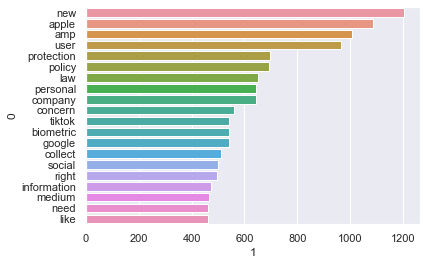

In [74]:
sns.barplot(data = freq_data, x = 1, y = 0);

In [75]:
most_common = []

for key in fdist.most_common(20):
    most_common.append(key[0])
    
most_common

['new',
 'apple',
 'amp',
 'user',
 'protection',
 'policy',
 'law',
 'personal',
 'company',
 'concern',
 'tiktok',
 'biometric',
 'google',
 'collect',
 'social',
 'right',
 'information',
 'medium',
 'need',
 'like']

In [77]:
fdist.most_common(10)

[('new', 1204),
 ('apple', 1086),
 ('amp', 1005),
 ('user', 966),
 ('protection', 695),
 ('policy', 691),
 ('law', 650),
 ('personal', 644),
 ('company', 644),
 ('concern', 561)]

In [78]:
len(fdist)

24073

In [79]:
freq_data = pd.DataFrame.from_dict(fdist.most_common(20))
freq_data


,0,1
0,new,1204
1,apple,1086
2,amp,1005
3,user,966
4,protection,695
5,policy,691
6,law,650
7,personal,644
8,company,644
9,concern,561


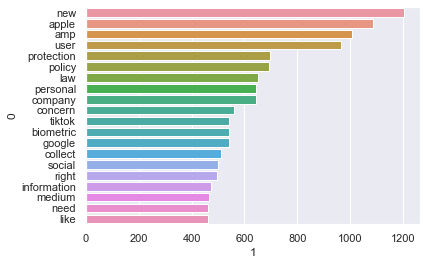

In [80]:
sns.barplot(data = freq_data, x = 1, y = 0);

Clustering

In [81]:
def evaluate_k_kmeans_inertia(k):
    print(f"running Kmeans with k={k}")
    estimator_kmeans = KMeans(random_state=42, n_clusters=k)
    estimator_kmeans.fit(text_vec)
    return estimator_kmeans.inertia_

In [82]:
%%time 
range_k = [i for i in range(1, 9)]
results_k = {}
for k in range_k:
    results_k[k] = evaluate_k_kmeans_inertia(k)

running Kmeans with k=1
running Kmeans with k=2
running Kmeans with k=3
running Kmeans with k=4
running Kmeans with k=5
running Kmeans with k=6
running Kmeans with k=7
running Kmeans with k=8
Wall time: 7min 21s


In [83]:
results_k

{1: 153768.86152110476,
 2: 150317.56798721064,
 3: 149265.7232278149,
 4: 149241.0683473133,
 5: 147653.8394148216,
 6: 147095.33105615704,
 7: 145949.3800134105,
 8: 145902.73769347245}

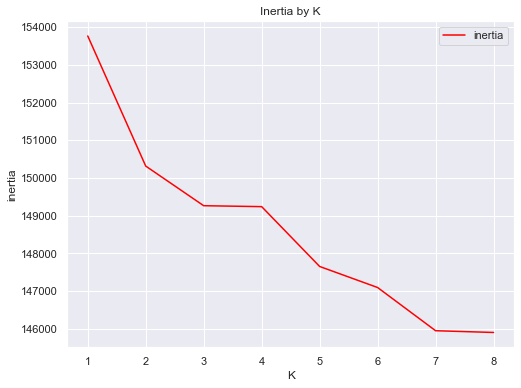

In [84]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(
    [c[0] for c in results_k.items()],
    [c[1] for c in results_k.items()], label="inertia", color="red")
ax.set_xlabel("K")
ax.set_ylabel("inertia")
ax.set_title("Inertia by K")
ax.legend();

In [90]:
 #Try k = 3 first
estimator_kmeans = KMeans(random_state=42, n_clusters=3) 

estimator_kmeans.fit(text_vec)

KMeans(n_clusters=3, random_state=42)

In [91]:
text_vec["cluster_id"] = estimator_kmeans.labels_
text_vec.head()

,0001860173,007,01,010,0100,01012021,01022018,020,05,050,...,zuboff,zuck,zuckerberg,zumbullaw,zunit14,zurich,õrf,ùgh,ùnwashed,cluster_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [92]:
text_clusters = text_vec.groupby('cluster_id').sum()
text_clusters.head()

,0001860173,007,01,010,0100,01012021,01022018,020,05,050,...,zscaler,zuboff,zuck,zuckerberg,zumbullaw,zunit14,zurich,õrf,ùgh,ùnwashed
cluster_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,6.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0


In [93]:
text_clusters_20 = text_clusters[['new',
 'apple',
 'amp',
 'user',
 'protection',
 'policy',
 'law',
 'personal',
 'company',
 'concern',
 'tiktok',
 'biometric',
 'google',
 'collect',
 'social',
 'right',
 'information',
 'medium',
 'need',
 'like']
]

text_clusters_20.head()

,new,apple,amp,user,protection,policy,law,personal,company,concern,tiktok,biometric,google,collect,social,right,information,medium,need,like
cluster_id,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,312.0,0.0,0.0,312.0,0.0,0.0
1,244.0,933.0,45.0,195.0,37.0,23.0,20.0,38.0,95.0,25.0,1.0,3.0,100.0,25.0,15.0,35.0,9.0,11.0,30.0,57.0
2,816.0,0.0,735.0,669.0,646.0,657.0,567.0,580.0,508.0,384.0,400.0,368.0,377.0,463.0,161.0,409.0,448.0,135.0,406.0,392.0


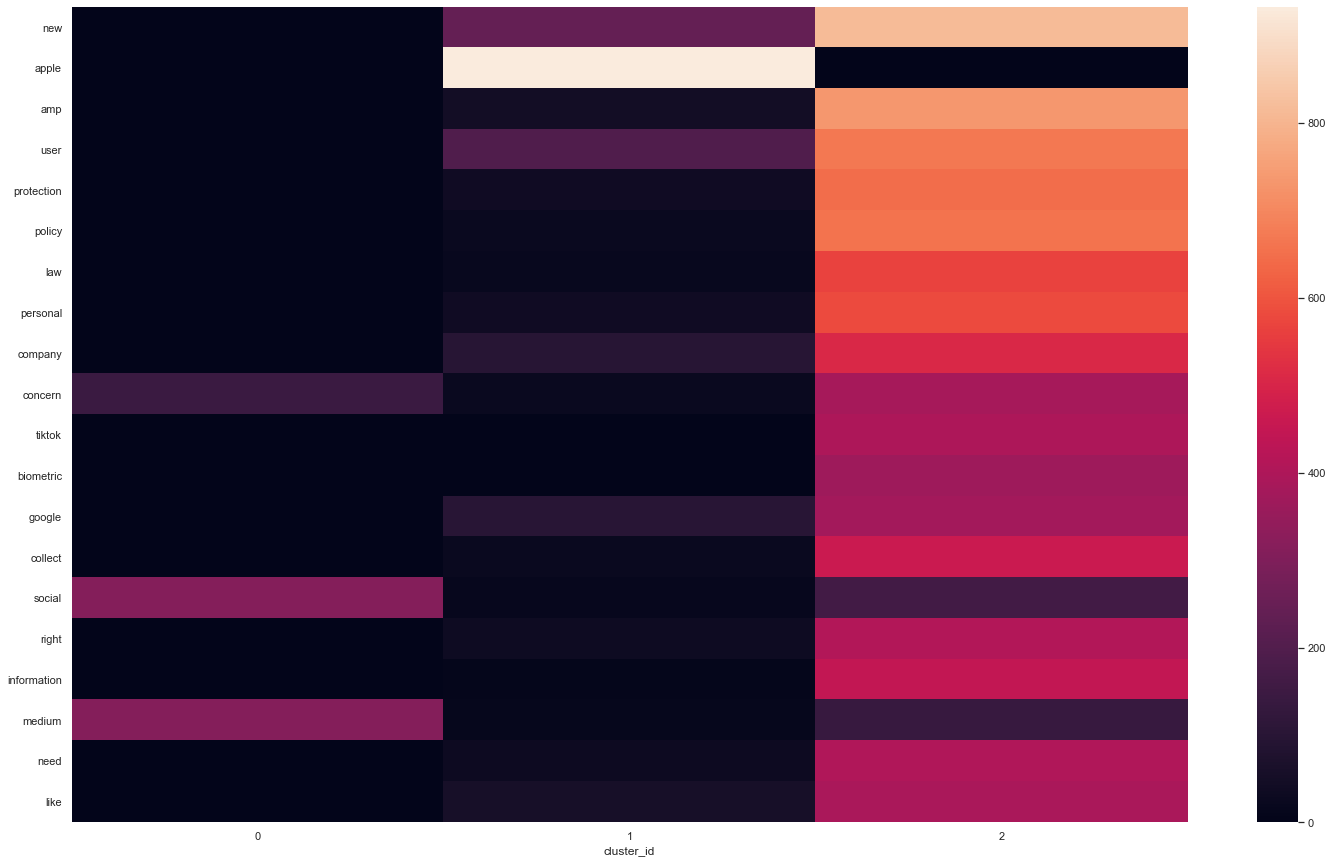

In [94]:
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(text_clusters_20.transpose(), annot=False);

In [99]:
#most variation in row no.2


TypeError: '(0        False
1        False
2        False
3        False
4        False
         ...  
10632    False
10633    False
10634    False
10635    False
10636    False
Name: cluster_id, Length: 10637, dtype: bool, 0)' is an invalid key